<a href="https://colab.research.google.com/github/brillantescene/Capstone_Design/blob/master/cnn_assist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
_URL = 'https://github.com/CapstoneDesign2020/machineLearning/raw/master/dataPreprocessing/assist_cnn_img.zip'

path_to_zip = tf.keras.utils.get_file('assist_cnn_img.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'assist_cnn_img')

124821504/124816391 [==============================] - 1s 0us/step


In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_absence_dir = os.path.join(train_dir, 'absence')
train_sound_dir = os.path.join(train_dir, 'sound')
validation_absence_dir = os.path.join(validation_dir, 'absence')
validation_sound_dir = os.path.join(validation_dir, 'sound')

In [0]:
num_absence_tr = len(os.listdir(train_absence_dir))
num_sound_tr = len(os.listdir(train_sound_dir))

num_absence_val = len(os.listdir(validation_absence_dir))
num_sound_val = len(os.listdir(validation_sound_dir))


In [7]:
print('total training absence images:', num_absence_tr)
print('total training sound images:', num_sound_tr)

print('total validation absence images:', num_absence_val)
print('total validation sound images:', num_sound_val)

total training absence images: 2119
total training sound images: 2000
total validation absence images: 600
total validation sound images: 500


In [0]:
BATCH_SIZE = 128
EPOCHS = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = num_absence_tr + num_sound_tr
VALIDATION_STEPS = num_absence_val + num_sound_val

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 4119 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1100 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

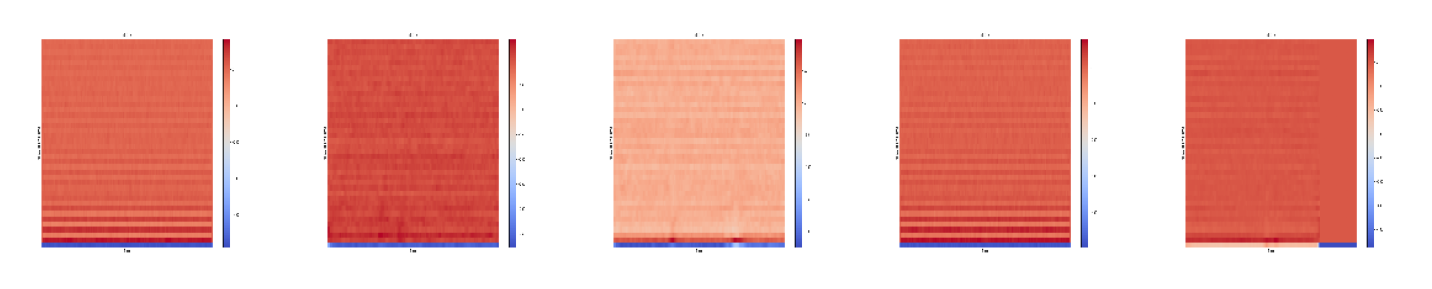

In [14]:
plotImages(sample_training_images[:5])

In [0]:
class AssistModel(tf.keras.Model):
    def __init__(self):
        super(AssistModel, self).__init__()
        self.conv1 = Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.drop1 = Dropout(rate=0.2)
        self.pool1 = MaxPool2D(padding='SAME')
        
        self.conv2 = Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.drop2 = Dropout(rate=0.2)
        self.pool2 = MaxPool2D(padding='SAME')
        
        self.conv3 = Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.drop3 = Dropout(rate=0.2)
        self.pool3 = MaxPool2D(padding='SAME')
        
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = Dense(units=1, activation=tf.nn.sigmoid)
        
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.drop1(net)
        net = self.pool1(net)
        
        net = self.conv2(net)
        net = self.drop2(net)
        net = self.pool2(net)
        
        net = self.conv3(net)
        net = self.drop3(net)
        net = self.pool3(net)
        
        net = self.pool3_flat(net)
        net = self.dense4(net)
        return net

In [0]:
model = AssistModel()

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=STEPS_PER_EPOCH // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=VALIDATION_STEPS // BATCH_SIZE
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
32/32 [==============================] - 361s 11s/step - loss: 0.6714 - accuracy: 0.5846 - val_loss: 0.6605 - val_accuracy: 0.8027
Epoch 2/15
32/32 [==============================] - 362s 11s/step - loss: 0.5879 - accuracy: 0.8076 - val_loss: 0.5915 - val_accuracy: 0.8271
Epoch 3/15
32/32 [==============================] - 362s 11s/step - loss: 0.5526 - accuracy: 0.8980 - val_loss: 0.5440 - val_accuracy: 0.9824
Epoch 4/15
32/32 [==============================] - 360s 11s/step - loss: 0.5176 - accuracy: 0.9817 - val_loss: 0.5357 - val_accuracy: 0.9824
Epoch 5/15
32/32 [==============================] - 362s 11s/step - loss: 0.5177 - accuracy: 0.9845 - val_loss: 0.5306 - val_accuracy: 0.9824
Epoch 6/15
32/32 [==============================] - 360s 11s/step - loss: 0.5150 - accuracy: 0.9880 - val_loss: 0.5267 - val_accuracy: 0.9902
Epoch 7/15
32/32 [==============================] - 371s 12s/step - loss

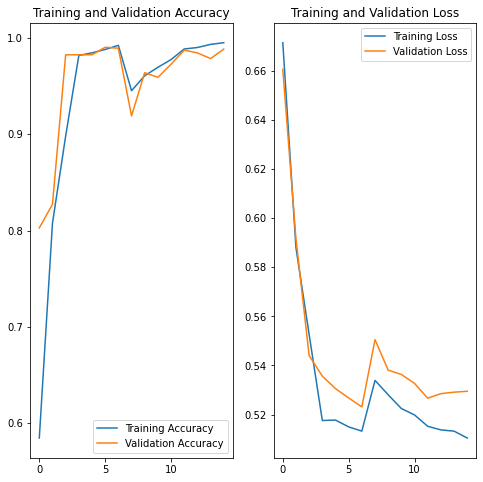

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()